In [1]:
import json 
import urllib
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot

### DATA SET 1 

In [2]:
from itertools import groupby
import urllib
url = 'https://data.renfe.com/api/3/action/datastore_search?resource_id=fd86c898-80d1-4cc2-b146-404980c4cf32&limit=1000'  
response = requests.get(url)
data = response.json()
sevilla_df = pd.DataFrame(data['result']['records'])
sevilla_df

sevilla_df['VIAJEROS_SUBIDOS'] == 526
sevilla_df[sevilla_df['VIAJEROS_SUBIDOS'] == 526]

#Para una franja horaria la estacion con mas viajeros subidos es San Bernardo con 526 viajeros


# Volumen de viajeros por estación en el núcleo de cercanías Sevilla, año 2018

,_id,CODIGO_ESTACION,NOMBRE_ESTACION,NUCLEO_CERCANIAS,TRAMO_HORARIO,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
658,659,51100,SAN BERNARDO,SEVILLA,15:00 - 15:30,526,286


In [3]:
sevilla_df.shape

(938, 7)

In [4]:
sevilla_df.columns

Index(['_id', 'CODIGO_ESTACION', 'NOMBRE_ESTACION', 'NUCLEO_CERCANIAS',
       'TRAMO_HORARIO', 'VIAJEROS_SUBIDOS', 'VIAJEROS_BAJADOS'],
      dtype='object')

In [5]:
sevilla_df.describe

<bound method NDFrame.describe of      _id  CODIGO_ESTACION      NOMBRE_ESTACION NUCLEO_CERCANIAS  \
0      1            40113  CAZALLA-CONSTANTINA          SEVILLA   
1      2            40113  CAZALLA-CONSTANTINA          SEVILLA   
2      3            40113  CAZALLA-CONSTANTINA          SEVILLA   
3      4            40113  CAZALLA-CONSTANTINA          SEVILLA   
4      5            40113  CAZALLA-CONSTANTINA          SEVILLA   
..   ...              ...                  ...              ...   
933  934            51003  SEVILLA-SANTA JUSTA          SEVILLA   
934  935            51003  SEVILLA-SANTA JUSTA          SEVILLA   
935  936            51003  SEVILLA-SANTA JUSTA          SEVILLA   
936  937            40113  CAZALLA-CONSTANTINA          SEVILLA   
937  938            40113  CAZALLA-CONSTANTINA          SEVILLA   

     TRAMO_HORARIO  VIAJEROS_SUBIDOS  VIAJEROS_BAJADOS  
0    07:00 - 07:30                 0                 0  
1    10:00 - 10:30                 0           

In [6]:
sevilla_df.groupby('TRAMO_HORARIO')['VIAJEROS_SUBIDOS'].sum().max()

2100

In [7]:
sevilla_df['VIAJEROS_SUBIDOS'].max()

526

In [8]:
url = 'https://data.renfe.com/api/3/action/datastore_search?resource_id=fd86c898-80d1-4cc2-b146-404980c4cf32&limit=1000'  
response = requests.get(url)
data = response.json()
sev_df = pd.DataFrame(data['result']['records'])
sev_df

,_id,CODIGO_ESTACION,NOMBRE_ESTACION,NUCLEO_CERCANIAS,TRAMO_HORARIO,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
0,1,40113,CAZALLA-CONSTANTINA,SEVILLA,07:00 - 07:30,0,0
1,2,40113,CAZALLA-CONSTANTINA,SEVILLA,10:00 - 10:30,0,0
2,3,40113,CAZALLA-CONSTANTINA,SEVILLA,17:00 - 17:30,0,0
3,4,40113,CAZALLA-CONSTANTINA,SEVILLA,17:30 - 18:00,0,0
4,5,40113,CAZALLA-CONSTANTINA,SEVILLA,18:30 - 19:00,0,0
...,...,...,...,...,...,...,...
933,934,51003,SEVILLA-SANTA JUSTA,SEVILLA,21:30 - 22:00,0,3
934,935,51003,SEVILLA-SANTA JUSTA,SEVILLA,22:00 - 22:30,0,4
935,936,51003,SEVILLA-SANTA JUSTA,SEVILLA,22:30 - 23:00,0,3
936,937,40113,CAZALLA-CONSTANTINA,SEVILLA,10:00 - 10:30,13,0


In [9]:
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="05:00 - 05:30", "TRAMO_HORARIO"] = "05:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="05:30 - 06:00", "TRAMO_HORARIO"] = "05:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="06:00 - 06:30", "TRAMO_HORARIO"] = "06:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="06:30 - 07:00", "TRAMO_HORARIO"] = "06:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="07:00 - 07:30", "TRAMO_HORARIO"] = "07:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="07:30 - 08:00", "TRAMO_HORARIO"] = "07:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="08:00 - 08:30", "TRAMO_HORARIO"] = "08:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="08:30 - 09:00", "TRAMO_HORARIO"] = "08:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="09:00 - 09:30", "TRAMO_HORARIO"] = "09:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="09:30 - 10:00", "TRAMO_HORARIO"] = "09:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="10:00 - 10:30", "TRAMO_HORARIO"] = "10:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="10:30 - 11:00", "TRAMO_HORARIO"] = "10:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="11:00 - 11:30", "TRAMO_HORARIO"] = "11:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="11:30 - 12:00", "TRAMO_HORARIO"] = "11:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="12:00 - 12:30", "TRAMO_HORARIO"] = "12:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="12:30 - 13:00", "TRAMO_HORARIO"] = "12:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="13:00 - 13:30", "TRAMO_HORARIO"] = "13:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="13:30 - 14:00", "TRAMO_HORARIO"] = "13:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="14:00 - 14:30", "TRAMO_HORARIO"] = "14:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="14:30 - 15:00", "TRAMO_HORARIO"] = "14:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="15:00 - 15:30", "TRAMO_HORARIO"] = "15:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="15:30 - 16:00", "TRAMO_HORARIO"] = "15:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="16:00 - 16:30", "TRAMO_HORARIO"] = "16:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="16:30 - 17:00", "TRAMO_HORARIO"] = "16:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="17:00 - 17:30", "TRAMO_HORARIO"] = "17:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="17:30 - 18:00", "TRAMO_HORARIO"] = "17:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="18:00 - 18:30", "TRAMO_HORARIO"] = "18:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="18:30 - 19:00", "TRAMO_HORARIO"] = "18:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="19:00 - 19:30", "TRAMO_HORARIO"] = "19:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="19:30 - 20:00", "TRAMO_HORARIO"] = "19:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="20:00 - 20:30", "TRAMO_HORARIO"] = "20:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="20:30 - 21:00", "TRAMO_HORARIO"] = "20:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="21:00 - 21:30", "TRAMO_HORARIO"] = "21:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="21:30 - 22:00", "TRAMO_HORARIO"] = "21:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="22:00 - 22:30", "TRAMO_HORARIO"] = "22:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="22:30 - 23:00", "TRAMO_HORARIO"] = "22:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="23:00 - 23:30", "TRAMO_HORARIO"] = "23:00"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="23:30 - 00:00", "TRAMO_HORARIO"] = "23:30"
sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="00:00 - 00:30", "TRAMO_HORARIO"] = "00:00"

In [10]:
sevilla_df['TRAMO_HORARIO']= pd.to_datetime(sevilla_df['TRAMO_HORARIO'], format='%H:%M')


In [11]:
# sevilla_df.loc[sevilla_df['TRAMO_HORARIO']=="1900-01-01 07:00:00", "TRAMO_HORARIO"] = "07:00"
sev_df.dtypes

_id                  int64
CODIGO_ESTACION      int64
NOMBRE_ESTACION     object
NUCLEO_CERCANIAS    object
TRAMO_HORARIO       object
VIAJEROS_SUBIDOS     int64
VIAJEROS_BAJADOS     int64
dtype: object

In [12]:
sev_df['VIAJEROS_SUBIDOS'].max()
sev_df['VIAJEROS_BAJADOS'].max()


783

In [13]:

# sevilla_df.corr()

<AxesSubplot:>

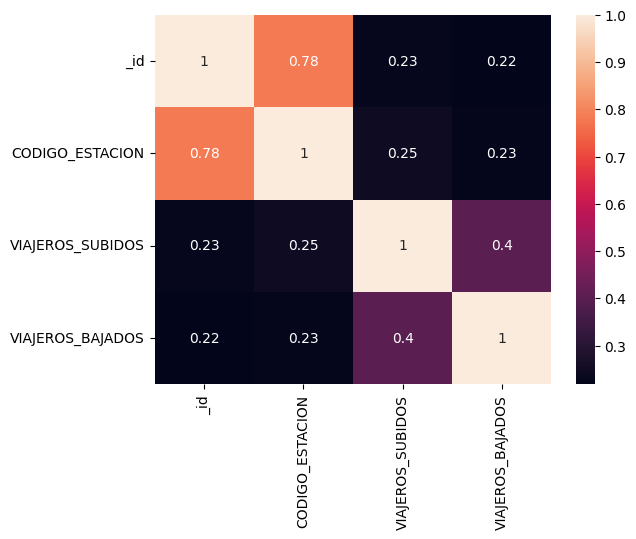

In [14]:
correlacion = sev_df.corr()
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns,
            annot=True)

In [15]:
sevilla_df.corr()

,_id,CODIGO_ESTACION,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
_id,1.000000,0.780053,0.228679,0.217659
CODIGO_ESTACION,0.780053,1.000000,0.247746,0.225177
VIAJEROS_SUBIDOS,0.228679,0.247746,1.000000,0.402291
VIAJEROS_BAJADOS,0.217659,0.225177,0.402291,1.000000


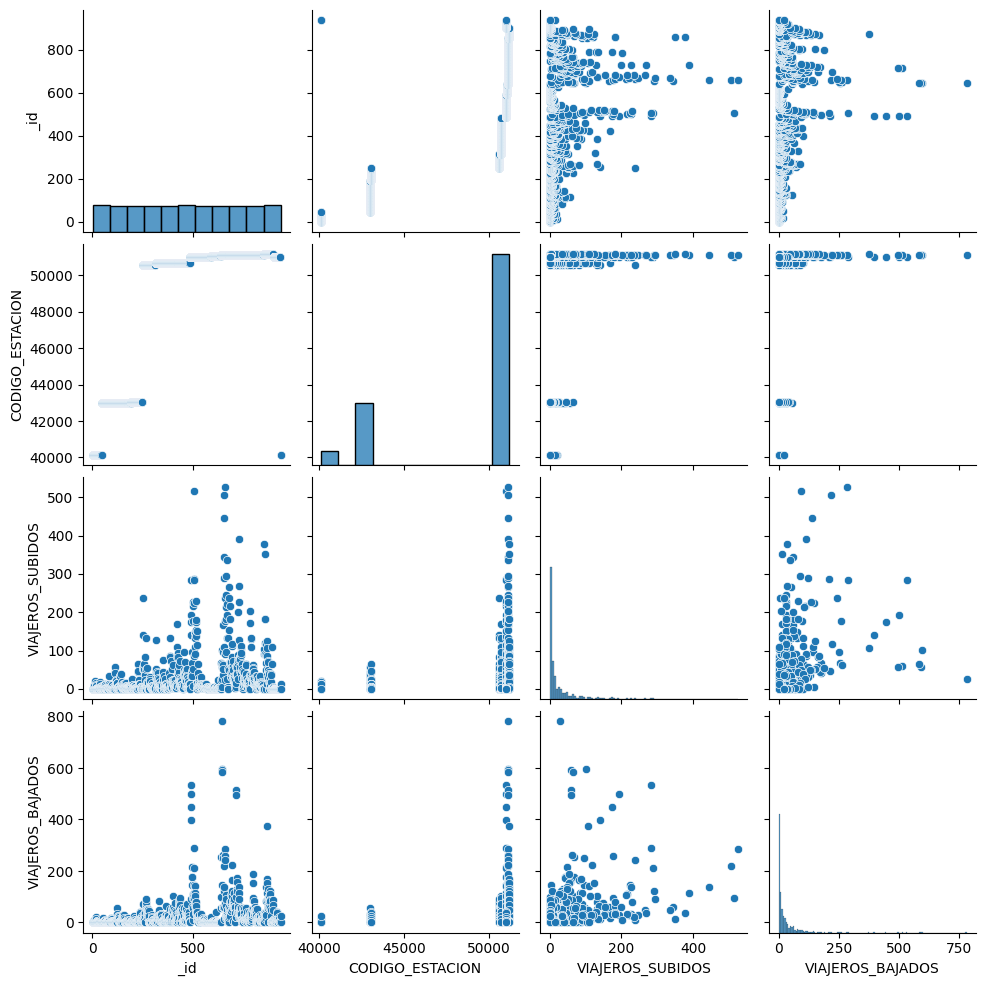

In [16]:
sns.pairplot(sevilla_df)

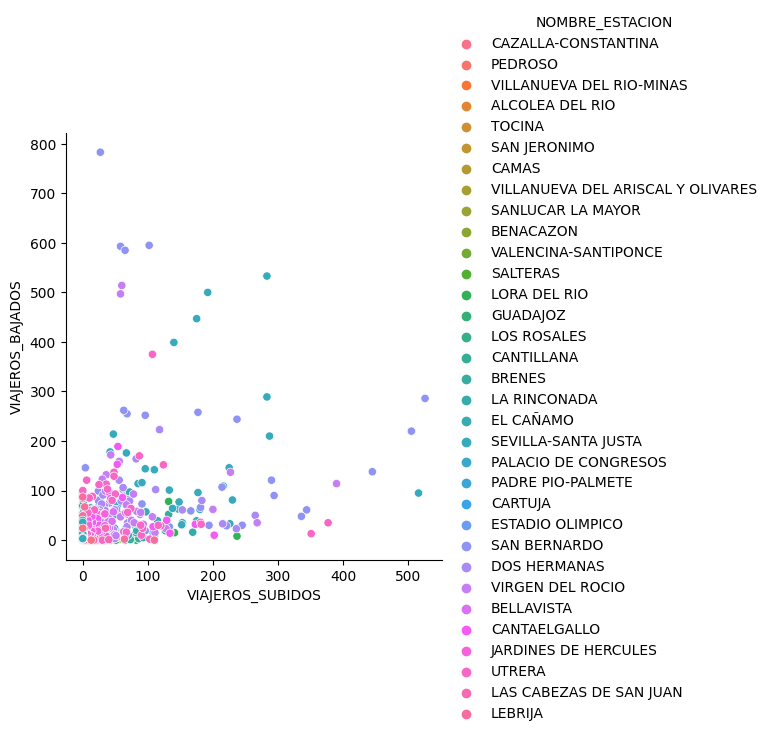

In [17]:
sns.relplot(x= 'VIAJEROS_SUBIDOS', y= 'VIAJEROS_BAJADOS', hue = 'NOMBRE_ESTACION', data= sev_df)

In [18]:
sev_df['TRAMO_HORARIO'].sort_values()

484    00:00 - 00:30
417    00:00 - 00:30
46     00:00 - 00:30
192    00:00 - 00:30
451    00:00 - 00:30
           ...      
346    23:30 - 00:00
313    23:30 - 00:00
135    23:30 - 00:00
161    23:30 - 00:00
781    23:30 - 00:00
Name: TRAMO_HORARIO, Length: 938, dtype: object

In [19]:
sev_df = sev_df.sort_values(by='TRAMO_HORARIO')

In [20]:
sev_df

,_id,CODIGO_ESTACION,NOMBRE_ESTACION,NUCLEO_CERCANIAS,TRAMO_HORARIO,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
484,485,51003,SEVILLA-SANTA JUSTA,SEVILLA,00:00 - 00:30,0,4
417,418,50703,LA RINCONADA,SEVILLA,00:00 - 00:30,1,0
46,47,43000,SAN JERONIMO,SEVILLA,00:00 - 00:30,0,0
192,193,43026,VALENCINA-SANTIPONCE,SEVILLA,00:00 - 00:30,0,0
451,452,50704,EL CAÑAMO,SEVILLA,00:00 - 00:30,1,1
...,...,...,...,...,...,...,...
346,347,50700,LOS ROSALES,SEVILLA,23:30 - 00:00,0,2
313,314,50602,GUADAJOZ,SEVILLA,23:30 - 00:00,1,0
135,136,43003,VILLANUEVA DEL ARISCAL Y OLIVARES,SEVILLA,23:30 - 00:00,0,0
161,162,43004,SANLUCAR LA MAYOR,SEVILLA,23:30 - 00:00,0,3


In [21]:
#se producen muchos viajes con trayectos entre virgen del rocio hasta lebrija con pocos viajeros
#se proudcen menos viajes o pocos viajes con muchos viajeros en la frnaka de brenes, la rinconada, el cañamo...(franja azul)

print(sevilla_df['VIAJEROS_BAJADOS'].mean())
print(sevilla_df['VIAJEROS_SUBIDOS'].mean())

30.30277185501066
30.30277185501066


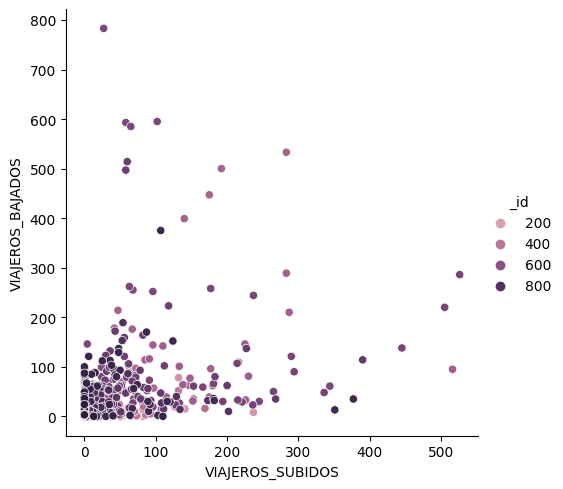

In [22]:
sns.relplot(x= 'VIAJEROS_SUBIDOS', y= 'VIAJEROS_BAJADOS', hue = '_id', data= sevilla_df)

In [23]:
id = sevilla_df.groupby('_id')[['NOMBRE_ESTACION']].sum()

sevilla_df['_id']==600
print(sevilla_df[sevilla_df['_id']==600])
print(sevilla_df[sevilla_df['_id']==800])

     _id  CODIGO_ESTACION NOMBRE_ESTACION NUCLEO_CERCANIAS  \
600  600            51050         CARTUJA          SEVILLA   

          TRAMO_HORARIO  VIAJEROS_SUBIDOS  VIAJEROS_BAJADOS  
600 1900-01-01 12:30:00                 3                 0  
     _id  CODIGO_ESTACION NOMBRE_ESTACION NUCLEO_CERCANIAS  \
799  800            51112    CANTAELGALLO          SEVILLA   

          TRAMO_HORARIO  VIAJEROS_SUBIDOS  VIAJEROS_BAJADOS  
799 1900-01-01 14:30:00                54               189  


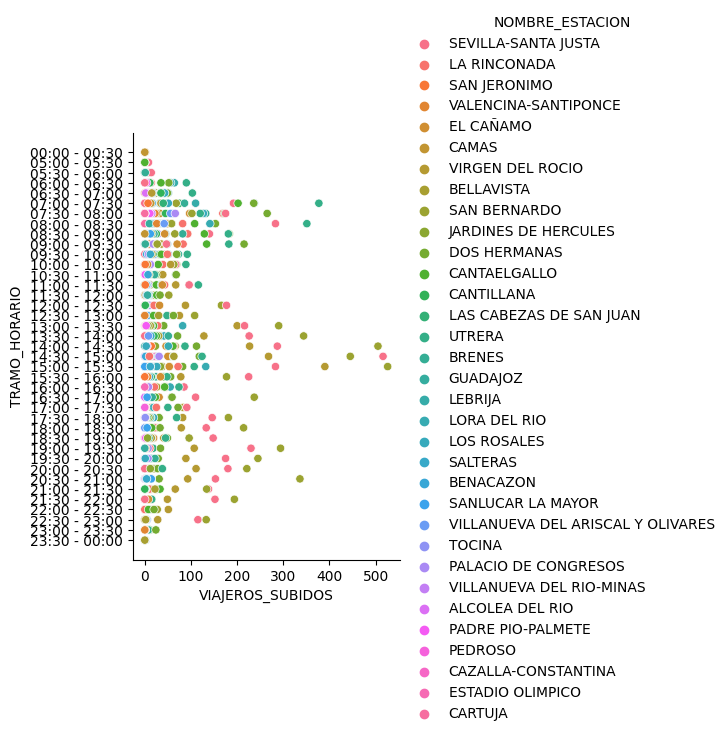

In [24]:
sns.relplot(x= 'VIAJEROS_SUBIDOS', y= 'TRAMO_HORARIO', hue = 'NOMBRE_ESTACION', data= sev_df)


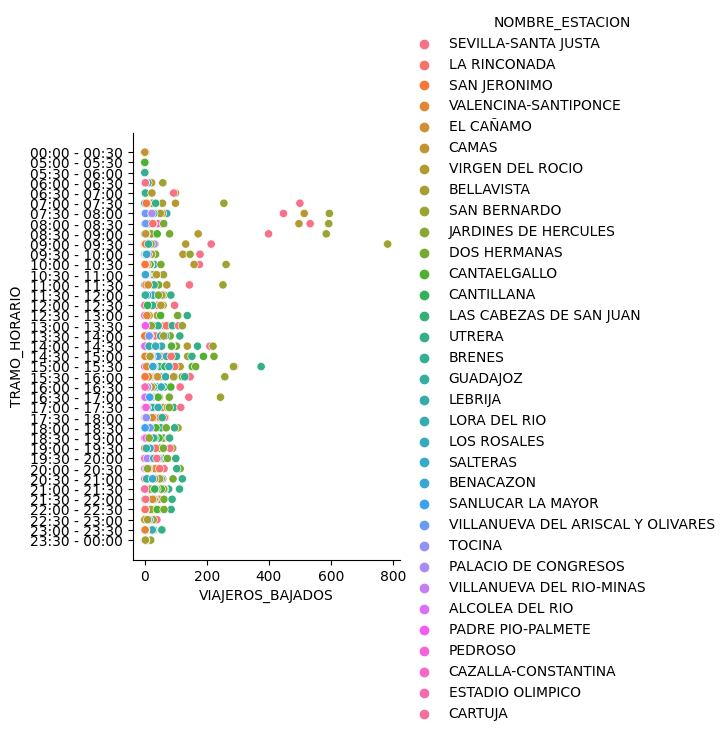

In [25]:
sns.relplot(x= 'VIAJEROS_BAJADOS', y= 'TRAMO_HORARIO', hue = 'NOMBRE_ESTACION', data= sev_df)


In [26]:
sev_df

,_id,CODIGO_ESTACION,NOMBRE_ESTACION,NUCLEO_CERCANIAS,TRAMO_HORARIO,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
484,485,51003,SEVILLA-SANTA JUSTA,SEVILLA,00:00 - 00:30,0,4
417,418,50703,LA RINCONADA,SEVILLA,00:00 - 00:30,1,0
46,47,43000,SAN JERONIMO,SEVILLA,00:00 - 00:30,0,0
192,193,43026,VALENCINA-SANTIPONCE,SEVILLA,00:00 - 00:30,0,0
451,452,50704,EL CAÑAMO,SEVILLA,00:00 - 00:30,1,1
...,...,...,...,...,...,...,...
346,347,50700,LOS ROSALES,SEVILLA,23:30 - 00:00,0,2
313,314,50602,GUADAJOZ,SEVILLA,23:30 - 00:00,1,0
135,136,43003,VILLANUEVA DEL ARISCAL Y OLIVARES,SEVILLA,23:30 - 00:00,0,0
161,162,43004,SANLUCAR LA MAYOR,SEVILLA,23:30 - 00:00,0,3


In [27]:
#Sacando el top 10 de estaciones de Sevilla con mas movimiento de viajeros en un periodo de 24 horas por estacion
top_estaciones = sev_df.groupby('NOMBRE_ESTACION').sum().sort_values(by='VIAJEROS_SUBIDOS',ascending= False )[:10]
top_estaciones

,_id,CODIGO_ESTACION,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
NOMBRE_ESTACION,,,,
SAN BERNARDO,24346,1890700,5592,5811
SEVILLA-SANTA JUSTA,50919,3723219,4993,5139
VIRGEN DEL ROCIO,27010,1891070,2914,2883
UTRERA,29597,1740800,2620,2620
DOS HERMANAS,24290,1788605,2463,2238
CANTAELGALLO,27183,1737808,1452,1473
LORA DEL RIO,9061,1720400,1113,1080
LA RINCONADA,14773,1723902,1075,1038
BRENES,14382,1825272,835,868


In [28]:
top_estaciones

,_id,CODIGO_ESTACION,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
NOMBRE_ESTACION,,,,
SAN BERNARDO,24346,1890700,5592,5811
SEVILLA-SANTA JUSTA,50919,3723219,4993,5139
VIRGEN DEL ROCIO,27010,1891070,2914,2883
UTRERA,29597,1740800,2620,2620
DOS HERMANAS,24290,1788605,2463,2238
CANTAELGALLO,27183,1737808,1452,1473
LORA DEL RIO,9061,1720400,1113,1080
LA RINCONADA,14773,1723902,1075,1038
BRENES,14382,1825272,835,868


In [29]:
top_estaciones.reset_index(inplace=True)

In [30]:
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = top_estaciones.NOMBRE_ESTACION,
                    y = top_estaciones.VIAJEROS_SUBIDOS,
                    mode = "lines",
                    name= 'VIAJEROS SUBIDOS',
                    marker = dict(color = 'rgba(241, 136, 10, 20)'),
                    text = top_estaciones.NOMBRE_ESTACION)
                   
                
# Creating trace2
trace2 = go.Scatter(
                    x = top_estaciones.NOMBRE_ESTACION,
                    y = top_estaciones.VIAJEROS_BAJADOS,
                    mode= "lines+markers",
                    name= 'VIAJEROS BAJADOS',
                    marker = dict(color = 'rgba(109, 192, 143,50 )'),
)

data = [trace1, trace2]
layout = {'title':'Top 10 estaciones de Sevilla con mas movimiento',
            'xaxis':{'title':'Estacion','ticklen':5}
}

fig = go.Figure({'data':data, 'layout':layout})



iplot(fig)

## DATA SET 2

In [31]:
url = "C:\\Users\\usuario\\Documents\\Repos Personales\\GO_Repos_TheBridge\\2-Data Analysis\\Proyecto-EDA\\turismo_medio.csv"

data = pd.read_csv(url, sep=";")
data.dtypes
medio = pd.DataFrame(data)
medio

total_llegadas = medio.iloc[:40]
total_llegadas

,Medios de transporte,Turistas/pernoctaciones,periodo,Total
0,Aeropuerto,Número de llegadas,2020,13.657.664
1,Aeropuerto,Número de llegadas,2019,68.691.898
2,Aeropuerto,Número de llegadas,2018,67.545.674
3,Aeropuerto,Número de llegadas,2017,66.639.515
4,Aeropuerto,Número de llegadas,2016,60.343.653
5,Aeropuerto,Número de pernoctaciones,2020,110.012.578
6,Aeropuerto,Número de pernoctaciones,2019,486.047.015
7,Aeropuerto,Número de pernoctaciones,2018,499.020.235
8,Aeropuerto,Número de pernoctaciones,2017,509.065.065
9,Aeropuerto,Número de pernoctaciones,2016,471.495.214


In [90]:
medio

,Medios de transporte,Turistas/pernoctaciones,periodo,Total
0,Aeropuerto,Número de llegadas,2020,13657664
1,Aeropuerto,Número de llegadas,2019,68691898
2,Aeropuerto,Número de llegadas,2018,67545674
3,Aeropuerto,Número de llegadas,2017,66639515
4,Aeropuerto,Número de llegadas,2016,60343653
5,Aeropuerto,Número de pernoctaciones,2020,110012578
6,Aeropuerto,Número de pernoctaciones,2019,486047015
7,Aeropuerto,Número de pernoctaciones,2018,499020235
8,Aeropuerto,Número de pernoctaciones,2017,509065065
9,Aeropuerto,Número de pernoctaciones,2016,471495214


In [32]:
total_llegadas['Total']= total_llegadas['Total'].str.replace('.',"")
total_llegadas['Total']= total_llegadas['Total'].astype(int)


c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [33]:
total_llegadas = total_llegadas[total_llegadas['Turistas/pernoctaciones'] == 'Número de llegadas']
total_llegadas.rename({'Medios de transporte':'Medios_de_transporte'},axis=1, inplace= True)
total_llegadas

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Medios_de_transporte,Turistas/pernoctaciones,periodo,Total
0,Aeropuerto,Número de llegadas,2020,13657664
1,Aeropuerto,Número de llegadas,2019,68691898
2,Aeropuerto,Número de llegadas,2018,67545674
3,Aeropuerto,Número de llegadas,2017,66639515
4,Aeropuerto,Número de llegadas,2016,60343653
10,Puerto,Número de llegadas,2020,223310
11,Puerto,Número de llegadas,2019,1720782
12,Puerto,Número de llegadas,2018,2012087
13,Puerto,Número de llegadas,2017,1965673
14,Puerto,Número de llegadas,2016,1635428


In [34]:
total_llegadas.groupby(['Medios_de_transporte', 'periodo'])['Total'].sum()
total_llegadas.sort_values(by= 'Medios_de_transporte',ascending=True)
total_llegadas



,Medios_de_transporte,Turistas/pernoctaciones,periodo,Total
0,Aeropuerto,Número de llegadas,2020,13657664
1,Aeropuerto,Número de llegadas,2019,68691898
2,Aeropuerto,Número de llegadas,2018,67545674
3,Aeropuerto,Número de llegadas,2017,66639515
4,Aeropuerto,Número de llegadas,2016,60343653
10,Puerto,Número de llegadas,2020,223310
11,Puerto,Número de llegadas,2019,1720782
12,Puerto,Número de llegadas,2018,2012087
13,Puerto,Número de llegadas,2017,1965673
14,Puerto,Número de llegadas,2016,1635428


In [35]:
total_perno = data[data['Turistas/pernoctaciones'] == 'Número de pernoctaciones']
total_perno

,Medios de transporte,Turistas/pernoctaciones,periodo,Total
5,Aeropuerto,Número de pernoctaciones,2020,110012578
6,Aeropuerto,Número de pernoctaciones,2019,486047015
7,Aeropuerto,Número de pernoctaciones,2018,499020235
8,Aeropuerto,Número de pernoctaciones,2017,509065065
9,Aeropuerto,Número de pernoctaciones,2016,471495214
15,Puerto,Número de pernoctaciones,2020,1660118
16,Puerto,Número de pernoctaciones,2019,9680363
17,Puerto,Número de pernoctaciones,2018,12766464
18,Puerto,Número de pernoctaciones,2017,14386362
19,Puerto,Número de pernoctaciones,2016,13234992


In [36]:
total_perno = total_perno.loc[:40]
total_perno

,Medios de transporte,Turistas/pernoctaciones,periodo,Total
5,Aeropuerto,Número de pernoctaciones,2020,110012578
6,Aeropuerto,Número de pernoctaciones,2019,486047015
7,Aeropuerto,Número de pernoctaciones,2018,499020235
8,Aeropuerto,Número de pernoctaciones,2017,509065065
9,Aeropuerto,Número de pernoctaciones,2016,471495214
15,Puerto,Número de pernoctaciones,2020,1660118
16,Puerto,Número de pernoctaciones,2019,9680363
17,Puerto,Número de pernoctaciones,2018,12766464
18,Puerto,Número de pernoctaciones,2017,14386362
19,Puerto,Número de pernoctaciones,2016,13234992


In [37]:
total_perno.rename({'Medios de transporte':'Medios_de_transporte'},axis=1, inplace= True)
total_perno

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Medios_de_transporte,Turistas/pernoctaciones,periodo,Total
5,Aeropuerto,Número de pernoctaciones,2020,110012578
6,Aeropuerto,Número de pernoctaciones,2019,486047015
7,Aeropuerto,Número de pernoctaciones,2018,499020235
8,Aeropuerto,Número de pernoctaciones,2017,509065065
9,Aeropuerto,Número de pernoctaciones,2016,471495214
15,Puerto,Número de pernoctaciones,2020,1660118
16,Puerto,Número de pernoctaciones,2019,9680363
17,Puerto,Número de pernoctaciones,2018,12766464
18,Puerto,Número de pernoctaciones,2017,14386362
19,Puerto,Número de pernoctaciones,2016,13234992


In [38]:
total_llegadas = total_llegadas.sort_values(by='Total', ascending= False)

In [85]:
# # prepare data frame
total_llegadas
total_perno

# import graph objects as "go"

import plotly.graph_objs as go

# # Creating trace1
trace1 = go.Bar(x=total_llegadas.periodo ,y=total_llegadas.Total, name= 'Número de llegadas', text =total_llegadas.Medios_de_transporte, marker =dict(color='rgba (109, 192,143)'))



# # Creating trace2
# trace2 = go.Scatter(x=df.world_rank,y=df.citations, name= 'citations', text = df.university_name, marker= ('color:#6DC08F))

data22 = [trace1]

layout = dict(title = 'Comparación del número de las llegadas anuales por medio de transporte',
             xaxis= dict(title= 'Año',ticklen= 10,zeroline= False)
            )

fig = go.Figure(dict(data=data22, layout=layout))

iplot(fig)

In [86]:
fig.write_html('medios_transporte.html')

In [40]:
medio['Medios de transporte']=='Tren'
tren_medio = medio[medio['Medios de transporte']=='Tren']
tren_medio
# noches_llegadas = tren_medio.groupby(['Medios de transporte','periodo'])['Total','Turistas/pernoctaciones'].sum().unstack()
# noches_llegadas


,Medios de transporte,Turistas/pernoctaciones,periodo,Total
30,Tren,Número de llegadas,2020,90399
31,Tren,Número de llegadas,2019,346756
32,Tren,Número de llegadas,2018,338242
33,Tren,Número de llegadas,2017,373662
34,Tren,Número de llegadas,2016,362849
35,Tren,Número de pernoctaciones,2020,534530
36,Tren,Número de pernoctaciones,2019,1892011
37,Tren,Número de pernoctaciones,2018,1979836
38,Tren,Número de pernoctaciones,2017,2106848
39,Tren,Número de pernoctaciones,2016,2265068


In [41]:
tren_medio['Turistas/pernoctaciones'] == 'Número de llegadas'
viajeros_tren=tren_medio[tren_medio['Turistas/pernoctaciones'] == 'Número de llegadas']

viajeros_tren

noches_tren= tren_medio[tren_medio['Turistas/pernoctaciones'] == 'Número de pernoctaciones']




In [88]:
import plotly.graph_objs as go

# # Creating trace1
trace1 = go.Bar(x=viajeros_tren.periodo ,y=viajeros_tren.Total, name= 'Número de llegadas', text =viajeros_tren['Medios de transporte'], marker =dict(color='rgba (109, 192,143)'))



# # Creating trace2
# trace2 = go.Scatter(x=df.world_rank,y=df.citations, name= 'citations', text = df.university_name, marker= ('color:#6DC08F))

data22 = [trace1]

layout = dict(title = 'Comparación del número de las llegadas producidas en tren',
             xaxis= dict(title= 'Año',ticklen= 5,zeroline= False)
            )

fig2 = go.Figure(dict(data=data22, layout=layout))

iplot(fig2)

In [89]:
fig2.write_html('tren_pandemia.html')

In [44]:
viajeros_tren.plot(kind="pie", x='periodo',y='Total',labels=viajeros_tren['periodo'],legend=False, autopct="%0.1f %%", title="Porcentaje anual de turistas llegados a España en tren")
noches_tren.plot(kind="pie", x='periodo',y='Total',labels=noches_tren['periodo'],legend=False, autopct="%0.1f %%", title="Porcentaje anual de pernoctaciones llegados a España")

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
tren_medio.nunique()

Medios de transporte        1
Turistas/pernoctaciones     2
periodo                     5
Total                      10
dtype: int64

### viajes en tren DATA SET 3

In [45]:
url = "C:\\Users\\usuario\\Documents\\Repos Personales\\GO_Repos_TheBridge\\2-Data Analysis\\Proyecto-EDA\\viajes-en-tren-sample.csv"

data = pd.read_csv(url, sep=",")
viajes = pd.DataFrame(data)



In [46]:
#bucle para cambiar las columnas a fechas
ls_salillega= ['departure','arrival']

for col in ls_salillega:
    viajes[col]= pd.to_datetime(viajes[col])

viajes

,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,renfe,MADRID,BARCELONA,2021-01-26 16:30:00,2021-01-26 19:15:00,2.75,AVE,Turista,64.25,Promo +,325,"{""Turista"": {""Promo +"": {""price"": 64.25, ""seat...",2020-12-14 12:00:00
1,renfe,BARCELONA,ZARAGOZA,2021-02-12 08:30:00,2021-02-12 10:16:48,1.78,AVE,Turista,33.50,Promo +,289,"{""Turista"": {""Promo +"": {""price"": 33.5, ""seats...",2021-01-22 06:00:00
2,renfe,MADRID,LEON,2021-01-21 13:25:00,2021-01-21 16:44:12,3.32,LD-AVE,Turista con enlace,41.85,Promo +,181,"{""Turista con enlace"": {""Promo +"": {""price"": 4...",2021-01-18 12:00:00
3,renfe,MADRID,VALENCIA,2021-02-21 06:20:00,2021-02-21 12:54:48,6.58,REGIONAL,Turista,28.35,Adulto ida,188,"{""Turista"": {""Adulto ida"": {""price"": 28.35, ""s...",2021-01-17 12:00:00
4,renfe,MADRID,BARCELONA,2020-10-27 07:40:00,2020-10-27 13:55:00,6.25,AVE-LD,Turista con enlace,43.50,Promo +,207,"{""Turista con enlace"": {""Promo +"": {""price"": 4...",2020-10-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,renfe,CÓRDOBA,MADRID,2020-11-05 11:29:00,2020-11-05 13:17:00,1.80,AVE,Turista,37.40,Promo +,250,"{""Turista"": {""Promo +"": {""price"": 37.4, ""seats...",2020-10-13 16:00:00
999996,renfe,BARCELONA,VALENCIA,2020-11-18 10:15:00,2020-11-18 12:55:12,2.67,EUROMED,Turista,28.50,Promo +,217,"{""Turista"": {""Promo +"": {""price"": 28.5, ""seats...",2020-11-08 04:00:00
999997,renfe,MADRID,BARCELONA,2020-11-09 12:30:00,2020-11-09 15:30:00,3.00,AVE,Turista,108.90,Flexible,250,"{""Turista"": {""Flexible"": {""price"": 108.9, ""sea...",2020-10-24 00:00:00
999998,renfe,MADRID,MÁLAGA,2020-10-31 09:35:00,2020-10-31 12:15:48,2.68,AVE,Turista,68.20,Promo +,255,"{""Turista"": {""Promo +"": {""price"": 68.2, ""seats...",2020-09-29 08:00:00


In [78]:
viajes['price'].max()

154.2

In [79]:
viajes.iloc['price']== 154.2

TypeError: Cannot index by location index with a non-integer key

In [ ]:
viajes.nunique()

company              1
origin               9
destination          9
departure        27292
arrival          36906
duration           188
vehicle_type        18
vehicle_class        5
price              323
fare                 3
seats              555
dtype: int64

In [97]:
#limpiar origenes con valores repetidos

viajes.drop(viajes.loc[viajes['origin']== 'MALAGA'].index, inplace= True )
viajes.drop(viajes.loc[viajes['origin']== 'CORDOBA'].index, inplace= True )
viajes.drop(viajes.loc[viajes['origin']== 'LEON'].index, inplace= True )



In [96]:
#limpiar destinos con valores repetidos

viajes.drop(viajes.loc[viajes['destination']== 'MALAGA'].index, inplace= True )
viajes.drop(viajes.loc[viajes['destination']== 'CORDOBA'].index, inplace= True )
viajes.drop(viajes.loc[viajes['destination']== 'LEON'].index, inplace= True )


In [98]:
viajes.nunique()

company               1
origin                9
destination           9
departure         27292
arrival           36906
duration            188
vehicle_type         18
vehicle_class         5
price               323
fare                  3
seats               555
meta             154727
insert_date        1031
dtype: int64

<AxesSubplot:>

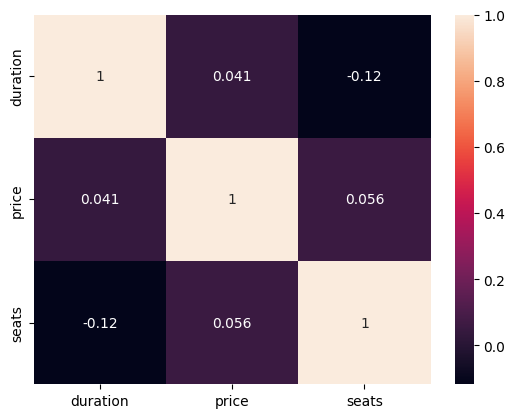

In [ ]:
correlacion3 = viajes.corr()
sns.heatmap(correlacion3, xticklabels=correlacion3.columns, yticklabels=correlacion3.columns,
            annot=True)


In [99]:
top_salidas = viajes.groupby("origin").count().sort_values(by="departure",ascending= False)["departure"][:10]
top_salidas

origin
MADRID        329496
BARCELONA     165918
ZARAGOZA      131817
VALENCIA       82636
VALLADOLID     79644
SEVILLA        34390
CÓRDOBA        25911
MÁLAGA          9544
LEÓN            8618
Name: departure, dtype: int64

In [100]:
top_llegadas = viajes.groupby("destination").count().sort_values(by="arrival",ascending= False)["departure"][:10]
top_llegadas

destination
MADRID        326949
BARCELONA     163153
ZARAGOZA      127716
VALLADOLID     87409
VALENCIA       83579
SEVILLA        33717
CÓRDOBA        26359
MÁLAGA          9748
LEÓN            9344
Name: departure, dtype: int64

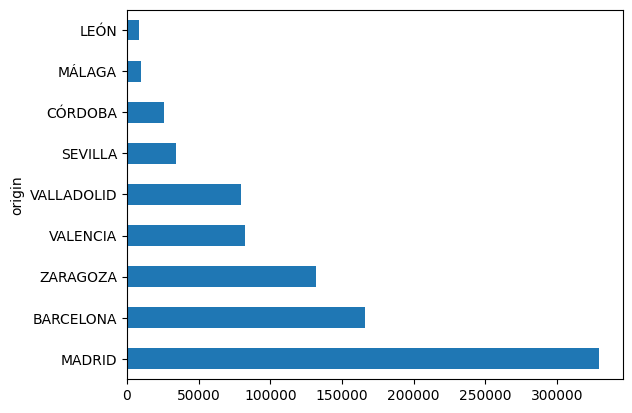

In [101]:
top_salidas.plot.barh()

plt.show()

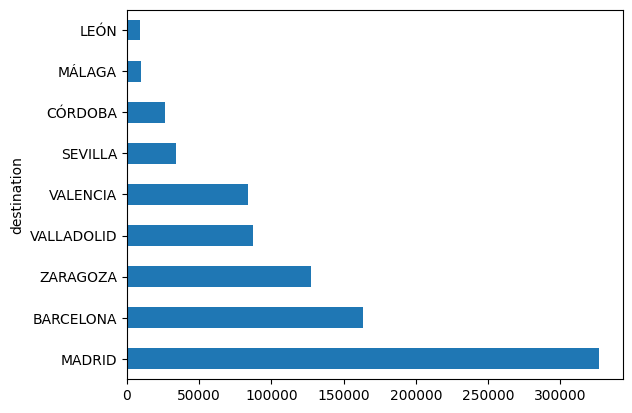

In [102]:
top_llegadas.plot.barh()

plt.show()

In [59]:
conteo_tarifas = viajes.groupby("vehicle_class").count().sort_values(by="price",ascending= False)[:10]
conteo_tarifas

,company,origin,destination,departure,arrival,duration,vehicle_type,price,fare,seats,meta,insert_date
vehicle_class,,,,,,,,,,,,
Turista,901487,901487,901487,901487,901487,901487,901487,901487,901487,901487,901487,901487
Turista con enlace,63999,63999,63999,63999,63999,63999,63999,63999,63999,63999,63999,63999
Turista Plus,33711,33711,33711,33711,33711,33711,33711,33711,33711,33711,33711,33711
Turista - Turista Plus,700,700,700,700,700,700,700,700,700,700,700,700
Turista Plus - Turista,103,103,103,103,103,103,103,103,103,103,103,103


In [53]:
pie_tarifas = conteo_tarifas.reset_index()

<AxesSubplot:title={'center':'Billetes comprados por tarifas'}, xlabel='vehicle_class'>

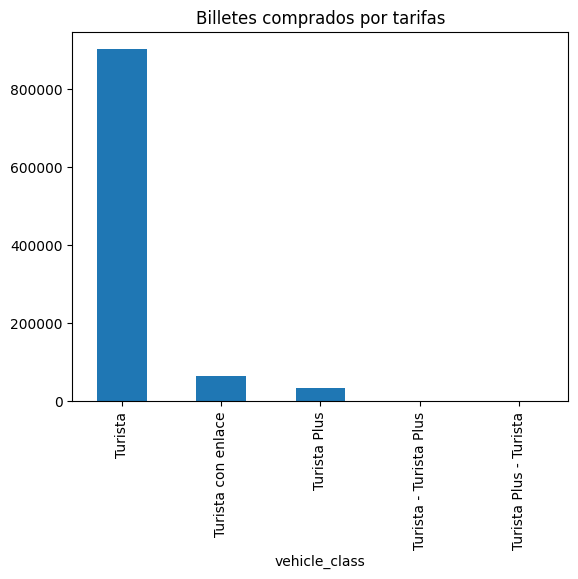

In [80]:
pie_tarifas.plot(kind="bar", x='vehicle_class',y='fare',legend=False, 
                         title="Billetes comprados por tarifas")

In [74]:
tiposdetren= viajes.groupby("vehicle_type").mean().sort_values(by="price",ascending= False)

<AxesSubplot:ylabel='vehicle_type'>

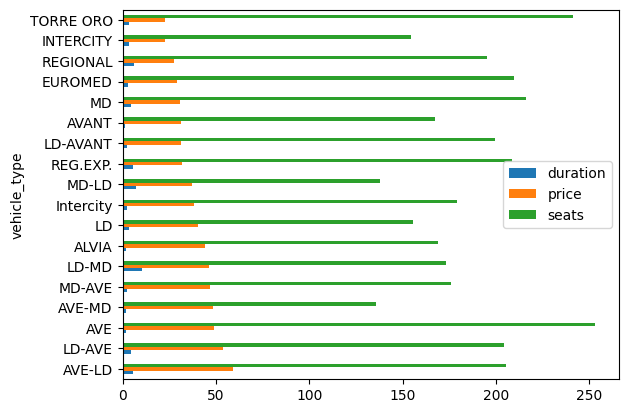

In [75]:
tiposdetren.plot.barh()

#precio, duracion y capacidad media por tipo de tren

<AxesSubplot:ylabel='vehicle_type'>

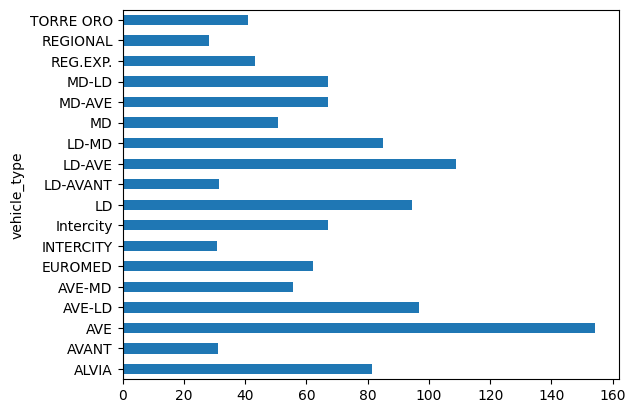

In [83]:
viajes['price'] == 154.2
viajes[viajes['price'] == 154.2]

#el billete mas caro ha sido el de tarifa turista plus y se ha producido en el trayecto madrid - barcelona

precioportipo= viajes.groupby("vehicle_type")['price'].max()

precioportipo.plot.barh()



In [ ]:
viajes['origin'].unique()

array(['MADRID', 'BARCELONA', 'CÓRDOBA', 'SEVILLA', 'ZARAGOZA',
       'VALENCIA', 'VALLADOLID', 'LEÓN', 'MÁLAGA'], dtype=object)

In [ ]:
tipo_tren = viajes['vehicle_type'].drop_duplicates()

In [ ]:
viajes

,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats
0,renfe,MADRID,BARCELONA,2021-01-26 16:30:00,2021-01-26 19:15:00,2.75,AVE,Turista,64.25,Promo +,325
1,renfe,BARCELONA,ZARAGOZA,2021-02-12 08:30:00,2021-02-12 10:16:48,1.78,AVE,Turista,33.50,Promo +,289
3,renfe,MADRID,VALENCIA,2021-02-21 06:20:00,2021-02-21 12:54:48,6.58,REGIONAL,Turista,28.35,Adulto ida,188
4,renfe,MADRID,BARCELONA,2020-10-27 07:40:00,2020-10-27 13:55:00,6.25,AVE-LD,Turista con enlace,43.50,Promo +,207
5,renfe,CÓRDOBA,MADRID,2020-10-20 09:50:00,2020-10-20 11:41:00,1.85,ALVIA,Turista,55.90,Flexible,144
...,...,...,...,...,...,...,...,...,...,...,...
999994,renfe,MADRID,CÓRDOBA,2020-11-16 15:05:00,2020-11-16 17:06:48,2.03,Intercity,Turista,55.90,Flexible,144
999995,renfe,CÓRDOBA,MADRID,2020-11-05 11:29:00,2020-11-05 13:17:00,1.80,AVE,Turista,37.40,Promo +,250
999996,renfe,BARCELONA,VALENCIA,2020-11-18 10:15:00,2020-11-18 12:55:12,2.67,EUROMED,Turista,28.50,Promo +,217
999997,renfe,MADRID,BARCELONA,2020-11-09 12:30:00,2020-11-09 15:30:00,3.00,AVE,Turista,108.90,Flexible,250
